ripping bag
average distance error 819.3694284641242


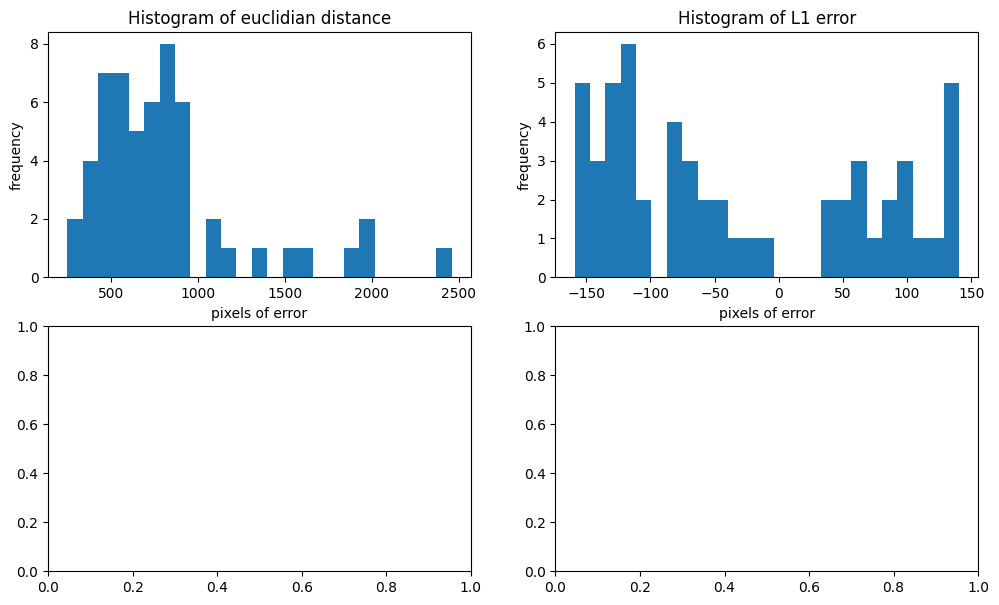

average error


In [2]:
from banners_mk2 import *

A = Analyzer('the_next_day', 25, '../calibrate', "rtk-co-locate.bag", "rtk-co-locate-click.csv")
# A.verifyFlight() # generates images of targets as a sanity check
A.doTheRoar() # actually will generate a report

l2 mean, median, mode 819.3694284641242 732.6388429828614 622.9873285011232
l2 (cm) mean, median, mode 74.48812986037493 66.60353118026013 56.63521168192029
l1 mean, median, mode -31.227936370780096 -64.98001643659961 140.4826527083933
l1 (cm) mean, median, mode -2.8389033064345535 -5.907274221509056 12.771150246217571


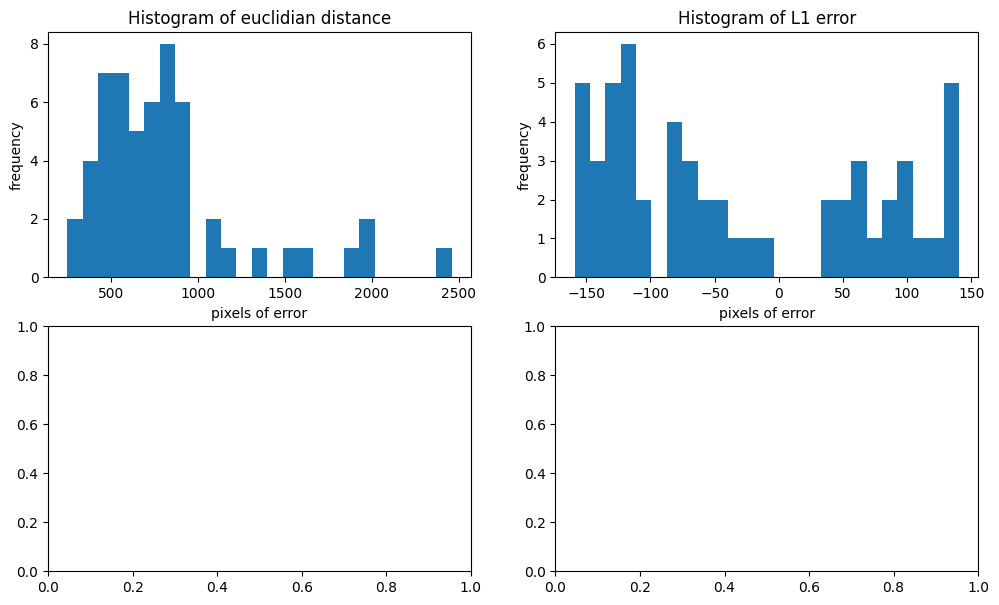

average error


In [24]:
import numpy as np
import statistics as st
def mmm(data):
    # print(data)
    # 2 norm
    norm2 = data['euclidian'].to_numpy()
    l2_mean = np.mean(norm2)
    l2_median = np.median(norm2)
    l2_mode = st.mode(norm2)
    print('l2 mean, median, mode', l2_mean, l2_median, l2_mode)

    norm2 = norm2 / 11
    l2_mean = np.mean(norm2)
    l2_median = np.median(norm2)
    l2_mode = st.mode(norm2)
    print('l2 (cm) mean, median, mode', l2_mean, l2_median, l2_mode)

    norm1 = data['L1'].to_numpy()
    l1_mean = np.mean(norm1)
    l1_median = np.median(norm1)
    l1_mode = st.mode(norm1)
    print('l1 mean, median, mode', l1_mean, l1_median, l1_mode)

    norm1 = norm1 / 11
    l1_mean = np.mean(norm1)
    l1_median = np.median(norm1)
    l1_mode = st.mode(norm1)
    print('l1 (cm) mean, median, mode', l1_mean, l1_median, l1_mode)

A.regreaphData(mmm)

In [13]:
# a little math to calculate dpi so we can do pixels to cm

# use K to get top left and bottom right corners

alt = 10
tl = np.array([0, 0, 1]).T
br = np.array([1920, 1080, 1]).T

tl = np.linalg.inv(rgb_K) @ tl
br = np.linalg.inv(rgb_K) @ br
print(tl, br)

tl /= tl[2]
br /= br[2]

tl *= 10
br *= 10

print(-tl, br)

[-0.29598225 -0.14738622  1.        ] [0.28081475 0.17806591 1.        ]
[  2.95982251   1.47386221 -10.        ] [ 2.80814748  1.78065911 10.        ]


In [21]:
sz = br - tl
print(sz)
sqm = sz[0] * sz[1] # square meters seen at 10m agl
print(sqm)
ppm = 1920*1080 / sqm # pixels per square meter
print(ppm)
ppc = ppm / (100**2)
print(ppc)

[5.76796999 3.25452132 0.        ]
18.771981291089972
110462.5008860532
11.04625008860532
